## ROC Curves for all algorithms

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report


In [48]:
# Store data as dataframe and display the head (from data stored in file)
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
                'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order',
                'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report',
                'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
                'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
                'word_freq_hp', 'word_freq_hpl', 'word_freq_george','word_freq_650', 'word_freq_lab', 'word_freq_labs',
                 'word_freq_telnet','word_freq_857', 'word_freq_data', 'word_freq_415','word_freq_85','word_freq_technology',
                'word_freq_1999', 'word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting',
                'word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',
                
                'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
                
                'capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam'
                ]

filepath = '/Users/ejallen/Desktop/Machine Learning Project/02_Data/spambase/spambase.data'
df_spam = pd.read_csv(filepath, header=None, names=column_names)

display(df_spam.head())

df_spam.shape

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


(4601, 58)

In [49]:
# split the data into training and testing
x = df_spam.drop('spam', axis=1)
y = df_spam.iloc[:,-1].to_numpy().ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Fold 0: Accuracy for logistic regression (with scaling): 0.936141304347826

Fold 1: Accuracy for logistic regression (with scaling): 0.9211956521739131

Fold 2: Accuracy for logistic regression (with scaling): 0.9307065217391305

Fold 3: Accuracy for logistic regression (with scaling): 0.9103260869565217

Fold 4: Accuracy for logistic regression (with scaling): 0.9293478260869565



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


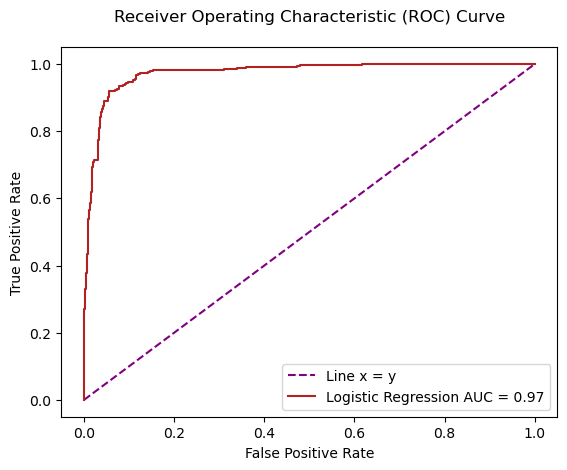

the Area under the ROC Curve (AUC) for logistic regression is 0.9734270124100632


In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    logistic = LogisticRegression(max_iter=150, 
                                  tol=0.1, 
                                  random_state=42,
                                  class_weight={0:0.4,1:0.6},
                                  penalty='l2',
                                  solver='newton-cg'
                                  )
    
    pipe = Pipeline([('scaler', StandardScaler()), ('logistic', logistic)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for logistic regression (with scaling): {accuracy}\n")
    k += 1

    if accuracy > best_score:
        best_model_logistic = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model_logistic['scaler'].transform(x_test)
y_pred = best_model_logistic['logistic'].predict(X_test_scaled)

# ------------------------------------------------------

# Get predicted probabilities for the positive class
y_probs = best_model_logistic.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_probs)
auc_roc_logistic = roc_auc_score(y_test, y_probs)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_logistic, tpr_logistic, color='firebrick', label=f'Logistic Regression AUC = {auc_roc_logistic:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'the Area under the ROC Curve (AUC) for logistic regression is {auc_roc_logistic}')

Fold 0: Accuracy for decision tree model (with scaling): 0.9144021739130435

Fold 1: Accuracy for decision tree model (with scaling): 0.8980978260869565

Fold 2: Accuracy for decision tree model (with scaling): 0.9184782608695652

Fold 3: Accuracy for decision tree model (with scaling): 0.9184782608695652

Fold 4: Accuracy for decision tree model (with scaling): 0.9334239130434783



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


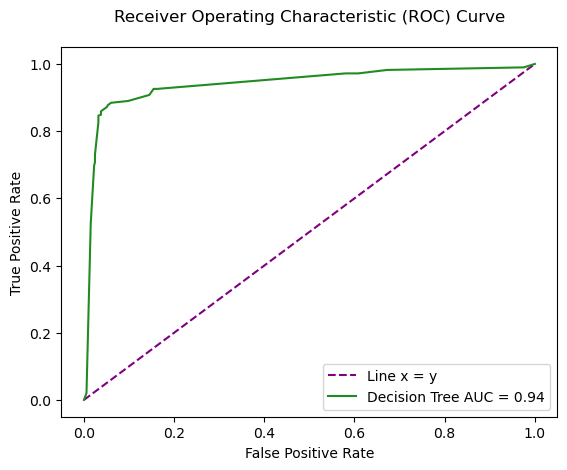

the Area under the ROC Curve (AUC) is 0.9401516248973876


In [51]:
## DECISION TREE **
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    decisionTreeModel = DecisionTreeClassifier(random_state=42, 
                                           max_depth=12, 
                                           criterion='gini', 
                                           splitter='best', 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           ccp_alpha=0.001)
    
    pipe = Pipeline([('scaler', StandardScaler()), ('decision_tree', decisionTreeModel)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for decision tree model (with scaling): {accuracy}\n")
    k += 1

    if accuracy > best_score:
        best_model_DT = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model_DT['scaler'].transform(x_test)
y_pred = best_model_DT['decision_tree'].predict(X_test_scaled)


# ------------------------------------------------------

# Get predicted probabilities for the positive class
y_probs_dt = best_model_DT.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_probs_dt)
roc_decision_tree = roc_auc_score(y_test, y_probs_dt)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_dt, tpr_dt, color='forestgreen', label=f'Decision Tree AUC = {roc_decision_tree:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'the Area under the ROC Curve (AUC) is {roc_decision_tree}')

Fold 0: Accuracy for KNN (with scaling): 0.9103260869565217

Fold 1: Accuracy for KNN (with scaling): 0.904891304347826

Fold 2: Accuracy for KNN (with scaling): 0.9130434782608695

Fold 3: Accuracy for KNN (with scaling): 0.9130434782608695

Fold 4: Accuracy for KNN (with scaling): 0.9157608695652174



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


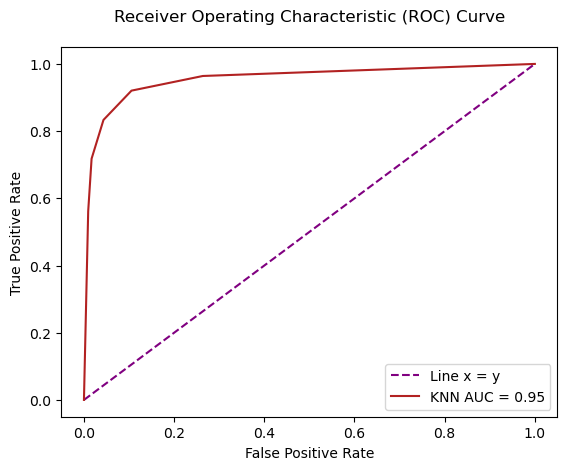

the Area under the ROC Curve (AUC) for KNN is 0.954606692742286


In [52]:
## K NEAREST NEIGHBOURS ##
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    K_neighbours = KNeighborsClassifier(n_neighbors=5, 
                                    metric='manhattan',
                                    algorithm='ball_tree'
                                    )
    
    pipe = Pipeline([('scaler', StandardScaler()), ('K_neighbours', K_neighbours)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for KNN (with scaling): {accuracy}\n")
    k += 1

    if accuracy > best_score:
        best_model_KNN = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model_KNN['scaler'].transform(x_test)
y_pred = best_model_KNN['K_neighbours'].predict(X_test_scaled)


# ------------------------------------------------------

# Get predicted probabilities for the positive class
y_probs_KNN = best_model_KNN.fit(x_train, y_train).predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_probs_KNN)
auc_knn = roc_auc_score(y_test, y_probs_KNN)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_knn, tpr_knn, color='firebrick', label=f'KNN AUC = {auc_knn:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f'the Area under the ROC Curve (AUC) for KNN is {auc_knn}')

Fold 0: Accuracy for SVM (with scaling): 0.9402173913043478

Fold 1: Accuracy for SVM (with scaling): 0.9320652173913043

Fold 2: Accuracy for SVM (with scaling): 0.9252717391304348

Fold 3: Accuracy for SVM (with scaling): 0.9144021739130435

Fold 4: Accuracy for SVM (with scaling): 0.938858695652174

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       531
           1       0.95      0.90      0.93       390

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.94       921
weighted avg       0.94      0.94      0.94       921



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


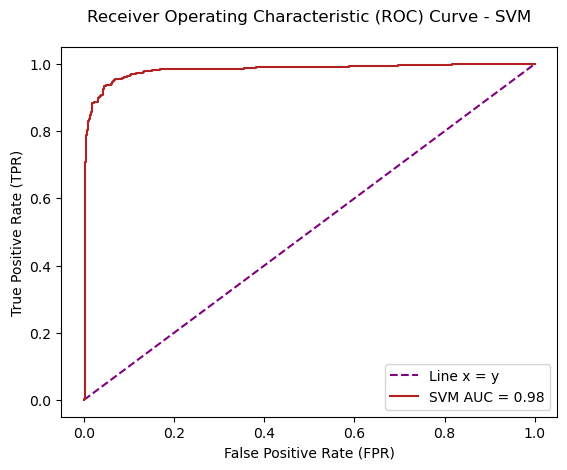

In [53]:
## SUPPORT VECTOR MACHINES ##
from sklearn.svm import SVC

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    svm_model = SVC(kernel='rbf',
                probability=True, 
                random_state=42,
                C=8,
                gamma='scale'
                )  
    
    pipe = Pipeline([('scaler', StandardScaler()), ('svm_model', svm_model)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for SVM (with scaling): {accuracy}\n")
    k += 1
    
    if accuracy > best_score:
        best_model_SVM = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model_SVM['scaler'].transform(x_test)
y_pred = best_model_SVM['svm_model'].predict(X_test_scaled)


# make and print classification report
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_result)

# ------------------------------------------------------

# Get predicted probabilities for the positive class
y_probs = best_model_SVM.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, y_probs)
auc_svm = roc_auc_score(y_test, y_probs)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_svm, tpr_svm, color='firebrick', label=f'SVM AUC = {auc_svm:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve - SVM\n')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Fold 0: Accuracy for MLP model (with scaling): 0.9375

Fold 1: Accuracy for MLP model (with scaling): 0.9524456521739131

Fold 2: Accuracy for MLP model (with scaling): 0.9307065217391305

Fold 3: Accuracy for MLP model (with scaling): 0.9375

Fold 4: Accuracy for MLP model (with scaling): 0.936141304347826


Accuracy for MLP model (with scaling) on test set: 0.9370249728555917



/Users/ejallen/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


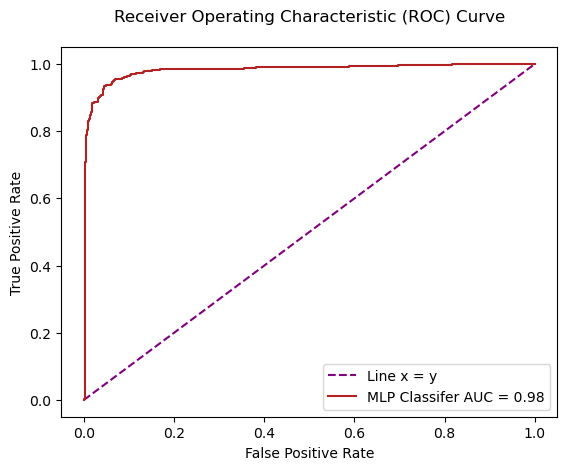

In [54]:
## MLP CLASSIFER ##
from sklearn.neural_network import MLPClassifier


kf = KFold(n_splits=5, shuffle=True, random_state=42)
k = 0
best_score = 0  

# Convert x_train and y_train to numpy arrays
X_train_val = np.array(x_train)
y_train_val = np.array(y_train)

# Loop over sections of data
for idx_train, idx_val in kf.split(X_train_val):
    X_train_k, X_val = X_train_val[idx_train], X_train_val[idx_val]
    y_train_k, y_val = y_train_val[idx_train], y_train_val[idx_val]

    # Use the pipeline to train a new model
    n = 39
    mlp_model = MLPClassifier(hidden_layer_sizes=(n,n), 
                           activation='relu',
                           solver='adam',
                           alpha=0.0001,
                           batch_size=32,
                           random_state=1, 
                           max_iter=150
                           )
    
    pipe = Pipeline([('scaler', StandardScaler()), ('mlp_model', mlp_model)])
    pipe.fit(X_train_k, y_train_k)
    y_pred_lr = pipe.predict(X_val)

    # Calculate accuracy for the validation set
    accuracy = accuracy_score(y_val, y_pred_lr)
    print(f"Fold {k}: Accuracy for MLP model (with scaling): {accuracy}\n")
    k += 1
    
    if accuracy > best_score:
        best_model = copy.deepcopy(pipe)
        best_score = accuracy

# calculate accuracy for the best model and predict y values 
X_test_scaled = best_model['scaler'].transform(x_test)
y_pred = best_model['mlp_model'].predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for MLP model (with scaling) on test set: {test_accuracy}\n")

# ------------------------------------------------------

# Compute ROC curve and AUC
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, y_probs)
auc_mlp = roc_auc_score(y_test, y_probs)

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_mlp, tpr_mlp, color='firebrick', label=f'MLP Classifer AUC = {auc_mlp:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

/var/folders/n8/wh5cqvq54xq7kc_btd8njq000000gp/T/ipykernel_19035/1497869874.py:189: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
/var/folders/n8/wh5cqvq54xq7kc_btd8njq000000gp/T/ipykernel_19035/1497869874.py:192: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)



Finished epoch 2, latest loss 1.2562402486801147
Finished epoch 4, latest loss 0.7019407749176025
Finished epoch 6, latest loss 0.7543046474456787
Finished epoch 8, latest loss 0.8187304735183716
Finished epoch 10, latest loss 0.8110955953598022
Finished epoch 12, latest loss 0.7666382789611816
Finished epoch 14, latest loss 0.7051408290863037
Finished epoch 16, latest loss 0.6587715744972229
Finished epoch 18, latest loss 0.6777634024620056
Finished epoch 20, latest loss 0.6956391334533691
Finished epoch 22, latest loss 0.6685065627098083
Finished epoch 24, latest loss 0.6526342630386353
Finished epoch 26, latest loss 0.6612047553062439
Finished epoch 28, latest loss 0.6671010255813599
Finished epoch 30, latest loss 0.6626721620559692
Finished epoch 32, latest loss 0.652854323387146
Finished epoch 34, latest loss 0.6481545567512512
Finished epoch 36, latest loss 0.6526135802268982
Finished epoch 38, latest loss 0.6525972485542297
Finished epoch 40, latest loss 0.6467770338058472
Fini

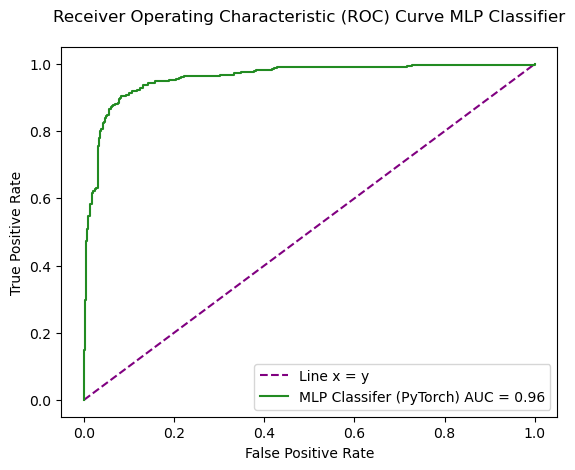

In [55]:
# PYTORCH MLP CLASSIFER
import torch
from torch import nn
import torch.optim as optim

class nnClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        """
        Constructor for the neural network classifier.
        Initializes the layers and activation functions.

        """
        self.hiddenLayerOne = nn.Linear(in_features=57, out_features=75)
        self.activationOne = nn.ReLU()
        self.hiddenLayerTwo = nn.Linear(in_features=75, out_features=50)
        self.activationTwo = nn.ReLU()
        self.hiddenLayerThree = nn.Linear(in_features=50, out_features=25)
        self.activationThree = nn.ReLU()
        self.output = nn.Linear(in_features=25, out_features=1)
        self.activationOutput = nn.Sigmoid()

    def forward(self, x):
        """
        Forward pass of the neural network.

        @ x: Input data tensor

        @return: Output tensor
        """
        x = self.activationOne(self.hiddenLayerOne(x))
        x = self.activationTwo(self.hiddenLayerTwo(x))
        x = self.activationThree(self.hiddenLayerThree(x))
        x = self.activationOutput(self.output(x))
        
        return x

def trainModel(model, X_train, y_train, X_val, y_val, epochs=500, lr=1e-4, weight_decay=0.01):
    """
    Trains the neural network model.

    @ model: Neural network model
    @ X_train: Training data
    @ y_train: Training labels
    @ X_val: Validation data
    @ y_val: Validation labels
    @ epochs: Number of training epochs
    @ lr: Learning rate
    @ weight_decay: L2 regularization strength

    @ return: Tuple containing the best model's state dictionary, training losses, and validation losses
    """
    # Define the loss function
    loss_fn = nn.BCELoss()

    # Initialize the model and optimiser
    optimiser = torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=weight_decay, eps=0.01)

    # Define things for later
    losses = []
    val_losses = []
    best_loss = float('inf')
    counter = 0

    for epoch in range(epochs):
        # Training loop
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
        losses.append(loss.item())

        # Validation loss
        val_loss = loss_fn(model(X_val), y_val)
        val_losses.append(val_loss.item())

        if val_loss < best_loss:
            best_loss = val_loss
            best_model = model.state_dict()
            counter = 0
        else:
            counter += 1

        if counter > 35:
            print('-------------------------------------------')
            print(f'Early stopping after {epoch + 1} epochs and {counter} epochs of no improvement')
            print('-------------------------------------------')
            break
        else:
            if (epoch + 1) % 2 == 0:
                print(f'Finished epoch {epoch + 1}, latest loss {loss.item()}')

    return best_model, losses, val_losses

def crossValidation(X, y, n_splits=5, epochs=500, lr=0.001):
    """
    Perform k-fold cross-validation.

    @ X: Input data
    @ y: Labels
    @ n_splits: Number of folds
    @ epochs: Number of training epochs
    @ lr: Learning rate

    @return: Tuple containing the best models, all training losses, and all validation losses
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    best_models = []
    all_train_losses = []
    all_val_losses = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Convert NumPy arrays to PyTorch tensors
        X_train = torch.FloatTensor(X_train)
        X_val = torch.FloatTensor(X_val)
        y_train = torch.FloatTensor(y_train)
        y_val = torch.FloatTensor(y_val)

        # Train the model
        print()
        best_model, train_losses, val_losses = trainModel(nnClassifier(), X_train, y_train, X_val, y_val, epochs=epochs, lr=lr)
        best_models.append(best_model)
        all_train_losses.append(train_losses)
        all_val_losses.append(val_losses)

    return best_models, all_train_losses, all_val_losses


def model_evaluation(best_models, X_test, y_test):
    """
    Evaluate the model on the test set.

    @ best_models: List of best models
    @ X_test: Test data
    @ y_test: Test labels

    @ return: Tuple containing the best model, predictions, binary predictions, and the index of the best model
    """

    highest_accuracy = 0
    best_model = nnClassifier()

    for idx, model_state_dict in enumerate(best_models):
        # Create a new instance of the model
        current_model = nnClassifier()

        # Load the state dictionary into the current_model
        current_model.load_state_dict(model_state_dict)

        # Evaluate the model on the test set
        y_pred = current_model(X_test)

        # Convert predictions to binary (0 or 1) based on threshold, 0.5
        y_pred_binary = (y_pred > 0.5).float()

        # Calculate accuracy
        accuracy = torch.sum(y_pred_binary == y_test).item() / len(y_test)

        print(f'Model Accuracy: {accuracy * 100:.2f}%')

        if accuracy > highest_accuracy:
            highest_accuracy = accuracy
            y_pred_best = y_pred
            y_pred_binary_best = y_pred_binary
            best_model.load_state_dict(best_models[idx])
            best_model_idx = idx

    return best_model, y_pred_best, y_pred_binary_best, best_model_idx

x = df_spam.drop('spam', axis=1).to_numpy()
y = df_spam.iloc[:,-1].to_numpy().ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# convert data into PyTorch tensors
X_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# convert data into PyTorch tensors
X_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

# Perform cross-validation
best_models, all_train_losses, all_val_losses = crossValidation(X_train, y_train)

# Perform model evaluation 
best_model, y_pred_best, y_pred_binary_best, best_model_idx = model_evaluation(best_models, X_test, y_test)

# ------------------------------------------------------

# Compute ROC curve and AUC
fpr_pynn, tpr_pynn, thresholds = roc_curve(y_test, y_pred_best.detach().numpy())
roc_mlp = roc_auc_score(y_test, y_pred_best.detach().numpy())

# superimposed diagonal line for comparison
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='purple', linestyle='--')
plt.plot(fpr_pynn, tpr_pynn, color='forestgreen', label=f'MLP Classifer (PyTorch) AUC = {roc_mlp:.2f}')

plt.title('Receiver Operating Characteristic (ROC) Curve MLP Classifier\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

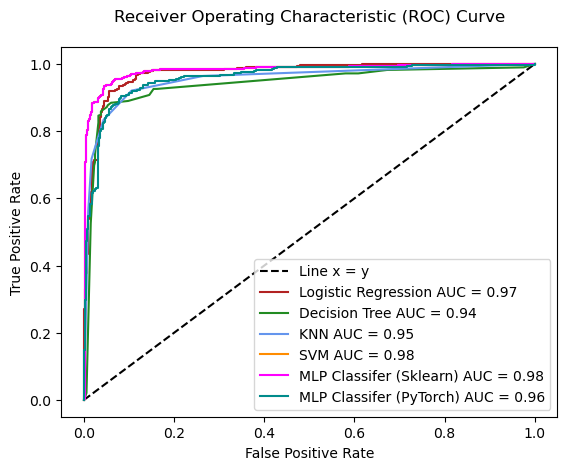

In [56]:
## PLOTTING ##
x_line = np.linspace(0, 1, 100)
plt.plot(x_line, x_line, label='Line x = y', color='black', linestyle='--')

plt.plot(fpr_logistic, tpr_logistic, color='firebrick', label=f'Logistic Regression AUC = {auc_roc_logistic:.2f}')
plt.plot(fpr_dt, tpr_dt, color='forestgreen', label=f'Decision Tree AUC = {roc_decision_tree:.2f}')
plt.plot(fpr_knn, tpr_knn, color='cornflowerblue', label=f'KNN AUC = {auc_knn:.2f}')
plt.plot(fpr_svm, tpr_svm, color='darkorange', label=f'SVM AUC = {auc_svm:.2f}')
plt.plot(fpr_mlp, tpr_mlp, color='magenta', label=f'MLP Classifer (Sklearn) AUC = {auc_mlp:.2f}')
plt.plot(fpr_pynn, tpr_pynn, color='darkcyan', label=f'MLP Classifer (PyTorch) AUC = {roc_mlp:.2f}')


plt.title('Receiver Operating Characteristic (ROC) Curve\n')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()